In [1]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/user/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('linear_regression_adv_lche329_ridge_9to1_VZ_comprehensive_UPD').getOrCreate()

# If you're getting an error with numpy, please type 'sudo pip install numpy --user' into the EC2 console.
from pyspark.ml.regression import LinearRegression

In [2]:
df = spark.read.load('./Sales_data/sales_en.csv',format='csv',header='true',inferSchema = True)

In [3]:
# Print the schema of the DataFrame. You can see potential features as well as the predictor.
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Product Name: string (nullable = true)
 |-- Unit: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Sales Representative: string (nullable = true)
 |-- Hospital Name: string (nullable = true)
 |-- Hospital Attribute: string (nullable = true)
 |-- Hospital Code: string (nullable = true)
 |-- Purchasing Price: double (nullable = true)
 |-- Selling Price: double (nullable = true)
 |-- IMF: string (nullable = true)
 |-- Hospital Class: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Client Name: string (nullable = true)
 |-- Sales Volume: double (nullable = true)
 |-- Profits: double (nullable = true)
 |-- Satisfaction: string (nullable = true)



In [5]:
df.head()

Row(ID=1, Year=2016, Product Name='Corbrin Capsule', Unit='Dept. 2', Region='Wuhan', Sales Representative='Xiongting', Hospital Name='Huazhongkejidaxuetongjiyixueyuanfushuxieheyiyuan', Hospital Attribute='Ministerial hospital', Hospital Code='ADXH', Purchasing Price=47.14, Selling Price=63.14, IMF='1571181790', Hospital Class='Third Class', Department='Shenneike', Client Name='Denganguo', Sales Volume=236.0, Profits=3776.0, Satisfaction='Y')

In [7]:
# A simple for loop allows us to make it even clearer. 
for item in df.head():
    print(item)

1
2016
Corbrin Capsule
Dept. 2
Wuhan
Xiongting
Huazhongkejidaxuetongjiyixueyuanfushuxieheyiyuan
Ministerial hospital
ADXH
47.14
63.14
1571181790
Third Class
Shenneike
Denganguo
236.0
3776.0
Y


In [8]:
# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [9]:
# The input columns are the feature column names, and the output column is what you'd like the new column to be named. 
# This time I will introduce a comprehensive coverage of independant variables 
assembler = VectorAssembler(
    inputCols=[
        "Product Name",
        "Region",
        "Sales Representative",
        "Hospital Name",
        "Hospital Attribute",
        "Purchasing Price",
        "Selling Price",
        "Hospital Class",
        "Department",
        "Client Name",
        "Sales Volume"],
    outputCol="features")

In [44]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="Product Name", outputCol="Product_Name_Index")
df_indexed = indexer.fit(df).transform(df)
indexer = StringIndexer(inputCol="Region", outputCol="Region_Index")
df_indexed = indexer.fit(df_indexed).transform(df_indexed)
indexer = StringIndexer(inputCol="Sales Representative", outputCol="Sales_Representative_Index")
df_indexed = indexer.fit(df_indexed).transform(df_indexed)
indexer = StringIndexer(inputCol="Hospital Name", outputCol="Hospital_Name_Index")
df_indexed = indexer.fit(df_indexed).transform(df_indexed)
indexer = StringIndexer(inputCol="Hospital Attribute", outputCol="Hospital_Attribute_Index")
df_indexed = indexer.fit(df_indexed).transform(df_indexed)
indexer = StringIndexer(inputCol="Hospital Class", outputCol="Hospital_Class_Index")
df_indexed = indexer.fit(df_indexed).transform(df_indexed)
indexer = StringIndexer(inputCol="Department", outputCol="Department_Index")
df_indexed = indexer.fit(df_indexed).transform(df_indexed)
indexer = StringIndexer(inputCol="Client Name", outputCol="Client_Name_Index")
df_indexed = indexer.fit(df_indexed).transform(df_indexed)
indexer = StringIndexer(inputCol="Satisfaction", outputCol="Satisfaction_Index")
df_indexed = indexer.fit(df_indexed).transform(df_indexed)

In [45]:
df_indexed.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Product Name: string (nullable = true)
 |-- Unit: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Sales Representative: string (nullable = true)
 |-- Hospital Name: string (nullable = true)
 |-- Hospital Attribute: string (nullable = true)
 |-- Hospital Code: string (nullable = true)
 |-- Purchasing Price: double (nullable = true)
 |-- Selling Price: double (nullable = true)
 |-- IMF: string (nullable = true)
 |-- Hospital Class: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Client Name: string (nullable = true)
 |-- Sales Volume: double (nullable = true)
 |-- Profits: double (nullable = true)
 |-- Satisfaction: string (nullable = true)
 |-- Product_Name_Index: double (nullable = true)
 |-- Region_Index: double (nullable = true)
 |-- Sales_Representative_Index: double (nullable = true)
 |-- Hospital_Name_Index: double (nullable = true)
 |-- Hospital_Attribute_

In [46]:
# The input columns are the feature column names, and the output column is what you'd like the new column to be named. 
assembler = VectorAssembler(
    inputCols=[
        "Product_Name_Index",
        "Region_Index",
        "Sales_Representative_Index",
        "Hospital_Name_Index",
        "Hospital_Attribute_Index",
        "Purchasing Price",
        "Selling Price",
        "Hospital_Class_Index",
        "Department_Index",
        "Client_Name_Index",
        "Sales Volume",
        "Satisfaction_Index"],
    outputCol="features")

In [47]:
# Now that we've created the assembler variable, let's actually transform the data.
output = assembler.transform(df_indexed)

In [48]:
# Using print schema, you see that the features output column has been added. 
output.printSchema()

# You can see that the features column is a dense vector that combines the various features as expected.
output.head(1)

root
 |-- ID: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Product Name: string (nullable = true)
 |-- Unit: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Sales Representative: string (nullable = true)
 |-- Hospital Name: string (nullable = true)
 |-- Hospital Attribute: string (nullable = true)
 |-- Hospital Code: string (nullable = true)
 |-- Purchasing Price: double (nullable = true)
 |-- Selling Price: double (nullable = true)
 |-- IMF: string (nullable = true)
 |-- Hospital Class: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Client Name: string (nullable = true)
 |-- Sales Volume: double (nullable = true)
 |-- Profits: double (nullable = true)
 |-- Satisfaction: string (nullable = true)
 |-- Product_Name_Index: double (nullable = true)
 |-- Region_Index: double (nullable = true)
 |-- Sales_Representative_Index: double (nullable = true)
 |-- Hospital_Name_Index: double (nullable = true)
 |-- Hospital_Attribute_

[Row(ID=1, Year=2016, Product Name='Corbrin Capsule', Unit='Dept. 2', Region='Wuhan', Sales Representative='Xiongting', Hospital Name='Huazhongkejidaxuetongjiyixueyuanfushuxieheyiyuan', Hospital Attribute='Ministerial hospital', Hospital Code='ADXH', Purchasing Price=47.14, Selling Price=63.14, IMF='1571181790', Hospital Class='Third Class', Department='Shenneike', Client Name='Denganguo', Sales Volume=236.0, Profits=3776.0, Satisfaction='Y', Product_Name_Index=0.0, Region_Index=0.0, Sales_Representative_Index=139.0, Hospital_Name_Index=0.0, Hospital_Attribute_Index=3.0, Hospital_Class_Index=0.0, Department_Index=3.0, Client_Name_Index=625.0, Satisfaction_Index=1.0, features=DenseVector([0.0, 0.0, 139.0, 0.0, 3.0, 47.14, 63.14, 0.0, 3.0, 625.0, 236.0, 1.0]))]

In [49]:
# Let's select two columns (the feature and predictor).
# This is now in the appropriate format to be processed by Spark.
final_data = output.select("features",'Profits')
final_data.show()

+--------------------+-------+
|            features|Profits|
+--------------------+-------+
|[0.0,0.0,139.0,0....| 3776.0|
|[0.0,0.0,139.0,0....| 5072.0|
|[0.0,0.0,139.0,0....| 4592.0|
|[0.0,0.0,139.0,0....| 2560.0|
|[0.0,0.0,139.0,0....| 1920.0|
|[0.0,0.0,139.0,0....| 1104.0|
|[0.0,0.0,139.0,0....| 2064.0|
|[0.0,0.0,139.0,0....| 2752.0|
|[0.0,0.0,139.0,0....| 3392.0|
|[0.0,0.0,139.0,0....| 4960.0|
|[0.0,0.0,139.0,0....| 2448.0|
|[0.0,0.0,139.0,0....|  288.0|
|(12,[2,4,5,6,8,9]...|    0.0|
|(12,[2,4,5,6,8,9]...|    0.0|
|[0.0,0.0,139.0,0....| 3536.0|
|(12,[2,4,5,6,8,9]...|    0.0|
|[0.0,0.0,139.0,0....| 9488.0|
|[0.0,0.0,139.0,0....|17760.0|
|[0.0,0.0,139.0,0....|  336.0|
|[0.0,0.0,139.0,0....|  336.0|
+--------------------+-------+
only showing top 20 rows



In [32]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
tokenzier = Tokenizer(inputCol="features",outputCol='Profits')
assembler = VectorAssembler(
    inputCols=[
        "Product Name",
        "Region",
        "Sales Representative",
        "Hospital Name",
        "Hospital Attribute",
        "Purchasing Price",
        "Selling Price",
        "Hospital Class",
        "Department",
        "Client Name",
        "Sales Volume"],
    outputCol="features")

output_interim = assembler.transform(df)

ProfitsData = tokenzier.transform(output_interim)

IllegalArgumentException: 'Data type StringType is not supported.'

In [50]:
import six
for i in output.columns:
    if not( isinstance(output.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to Profits for ", i, output.stat.corr('Profits',i))

Correlation to Profits for  ID -0.04298189727486545
Correlation to Profits for  Year nan
Correlation to Profits for  Purchasing Price -0.0043147677815501715
Correlation to Profits for  Selling Price 0.0011047764804696736
Correlation to Profits for  Sales Volume 0.7670380621771913
Correlation to Profits for  Profits 1.0
Correlation to Profits for  Product_Name_Index -0.07044769454556628
Correlation to Profits for  Region_Index -0.05868244628428352
Correlation to Profits for  Sales_Representative_Index 0.081448627436624
Correlation to Profits for  Hospital_Name_Index 0.012955003608409657
Correlation to Profits for  Hospital_Attribute_Index 0.0528020036972183
Correlation to Profits for  Hospital_Class_Index -0.009265694397224664
Correlation to Profits for  Department_Index 0.007033404442054398
Correlation to Profits for  Client_Name_Index -0.06603259536027041
Correlation to Profits for  Satisfaction_Index 0.6447989209209817


IllegalArgumentException: 'requirement failed: Currently correlation calculation for columns with dataType org.apache.spark.ml.linalg.VectorUDT@3bfc3ba7 not supported.'

In [51]:
import six
for i in output.columns:
    if not( isinstance(output.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to Satisfaction_Index for ", i, output.stat.corr('Satisfaction_Index',i))

Correlation to Satisfaction_Index for  ID -0.04893289270799821
Correlation to Satisfaction_Index for  Year nan
Correlation to Satisfaction_Index for  Purchasing Price 0.008287856559843694
Correlation to Satisfaction_Index for  Selling Price 0.013293945386753747
Correlation to Satisfaction_Index for  Sales Volume 0.5084999907668102
Correlation to Satisfaction_Index for  Profits 0.6447989209209817
Correlation to Satisfaction_Index for  Product_Name_Index -0.06070227095016613
Correlation to Satisfaction_Index for  Region_Index -0.06797617917019336
Correlation to Satisfaction_Index for  Sales_Representative_Index 0.07765096458458376
Correlation to Satisfaction_Index for  Hospital_Name_Index 0.010556651322604632
Correlation to Satisfaction_Index for  Hospital_Attribute_Index 0.060122559296437304
Correlation to Satisfaction_Index for  Hospital_Class_Index -0.016352222130619334
Correlation to Satisfaction_Index for  Department_Index 0.005523606544791623
Correlation to Satisfaction_Index for  

IllegalArgumentException: 'requirement failed: Currently correlation calculation for columns with dataType org.apache.spark.ml.linalg.VectorUDT@3bfc3ba7 not supported.'

In [40]:
import six
for i in df.columns:
    if not( isinstance(df.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to Profits for ", i, df.stat.corr('Profits',i))

Correlation to Profits for  ID -0.04298189727486545
Correlation to Profits for  Year nan
Correlation to Profits for  Purchasing Price -0.0043147677815501715
Correlation to Profits for  Selling Price 0.0011047764804696736
Correlation to Profits for  Sales Volume 0.7670380621771913
Correlation to Profits for  Profits 1.0


In [135]:
# Let's do a randomised 90/10 split. 
# Remember, you can use other splits depending on how easy/difficult it is to train your model.
train_data,test_data = final_data.randomSplit([0.9,0.1])

In [136]:
# Let's see our training data.
print('Training data')
train_data.describe().show()

print('Testing data')
# And our testing data.
test_data.describe().show()

Training data
+-------+------------------+
|summary|           Profits|
+-------+------------------+
|  count|             36220|
|   mean|232.65075504200374|
| stddev| 905.0076570350352|
|    min|           -130.02|
|    max|           38656.0|
+-------+------------------+

Testing data
+-------+------------------+
|summary|           Profits|
+-------+------------------+
|  count|              4065|
|   mean|252.93768659061888|
| stddev| 994.2142046617925|
|    min|           -130.02|
|    max|           24280.8|
+-------+------------------+



In [137]:
#elasticNetParam=0,the trained model reduces to a ridge regression model.
lr = LinearRegression(maxIter=10,regParam=0.3,elasticNetParam=0,labelCol='Profits')

In [138]:
# Fit the model to the data.
lrModel = lr.fit(train_data)

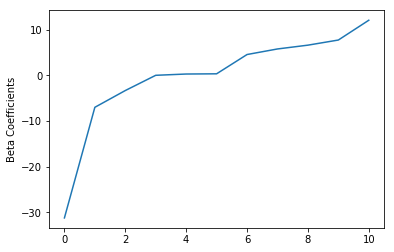

In [139]:
import matplotlib.pyplot as plt
import numpy as np

beta=np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

In [140]:
# Print the coefficients and intercept for linear regression.
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

Coefficients: [-31.217706828124033,-3.3482006142181113,0.31246573308677544,0.26534904764383355,7.7023893991914205,-7.016181510567703,6.580634019574346,5.748735320661165,4.530550397702242,-0.015209452705925802,12.031686925717938] Intercept: -33.32468650198274


In [141]:
# Let's evaluate the model against the test data.
test_results = lrModel.evaluate(test_data)

In [142]:
# Interesting results! This shows the difference between the predicted value and the test data.
test_results.residuals.show()

# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME_Ridge: {}".format(test_results.rootMeanSquaredError))

+-------------------+
|          residuals|
+-------------------+
| -98.63032293707082|
| -315.0564015723963|
|-124.21003308641187|
|-1.7423410248144648|
| -4.713642804309373|
| -32.88778552413359|
| -88.26712963362822|
| -54.16285273956737|
|-13.629661278275108|
|  -98.4969431914096|
|  16.86519823842781|
| -73.09199492251025|
| 15.631881961363007|
| 23.601926635547485|
| -77.00486999682441|
| -65.65861827820376|
|-28.699648202804056|
|  25.61330741005699|
|    58.815542667093|
|-28.925923484729296|
+-------------------+
only showing top 20 rows

RSME_Ridge: 694.5068251361375


In [143]:
# We can also get the R2 value. 
print("R2_Ridge: {}".format(test_results.r2))

R2_Ridge: 0.5119099445708014


In [144]:
final_data.describe().show()

+-------+------------------+
|summary|           Profits|
+-------+------------------+
|  count|             40285|
|   mean|234.69782905826548|
| stddev| 914.4112274804912|
|    min|           -130.02|
|    max|           38656.0|
+-------+------------------+



In [145]:
results_w_columns=lrModel.transform(test_data)

In [146]:
results_w_columns.dtypes

[('features', 'vector'), ('Profits', 'double'), ('prediction', 'double')]

In [147]:
results_w_columns.toPandas()

,features,Profits,prediction
0,"(1.0, 0.0, 104.0, 65.0, 0.0, 40.14, 64.3, 0.0,...",0.00,98.630323
1,"(5.0, 0.0, 0.0, 2.0, 0.0, 917.62, 1047.64, 0.0...",0.00,315.056402
2,"(0.0, 2.0, 109.0, 137.0, 0.0, 47.14, 63.14, 0....",0.00,124.210033
3,"(0.0, 2.0, 2.0, 27.0, 0.0, 47.14, 63.14, 0.0, ...",0.00,1.742341
4,"(0.0, 2.0, 85.0, 70.0, 0.0, 47.14, 63.14, 0.0,...",0.00,4.713643
5,"(0.0, 2.0, 93.0, 41.0, 0.0, 47.14, 63.14, 0.0,...",0.00,32.887786
6,"(0.0, 2.0, 109.0, 80.0, 0.0, 47.14, 63.14, 0.0...",0.00,88.267130
7,"(0.0, 4.0, 43.0, 138.0, 0.0, 47.14, 63.14, 0.0...",0.00,54.162853
8,"(0.0, 4.0, 43.0, 138.0, 0.0, 47.14, 63.14, 0.0...",0.00,13.629661
9,"(0.0, 0.0, 68.0, 109.0, 4.0, 47.14, 63.14, 0.0...",0.00,98.496943


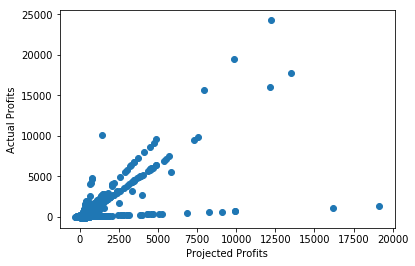

In [148]:
import matplotlib.pyplot as plt
plt.scatter(x=results_w_columns.toPandas()['prediction'],y=results_w_columns.toPandas()['Profits'])
plt.xlabel('Projected Profits')
plt.ylabel('Actual Profits')
plt.show()